# 第二章 基础二维图
## 2.9 二维物理场等值线图



In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from netCDF4 import Dataset

### 基本参数介绍

本节只介绍结构化网格数据的等值线绘制及相关属性设置，散点及非结构化数据的等值线及色彩图见3.2节

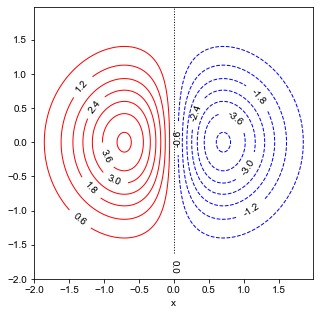

In [39]:
# 数据
delta=0.01
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta*2)
X, Y = np.meshgrid(x, y)
Z = -X*np.exp(-X**2 - Y**2)*10

# 2. 画布
fig=plt.figure(figsize=(5,5))
ax=plt.gca()
CS = ax.contour(X,Y,Z, levels=15, colors='k', linewidths=1)
# 自定义线型
for line, lvl in zip(CS.collections, CS.levels):
    if(lvl<0):
        line.set_linestyle('--')
        line.set_color('b')
    elif(lvl==0):
        line.set_linestyle('dotted')
    else:
        line.set_linestyle('-')
        line.set_color('r')

ax.clabel(CS, fmt='%.1f', inline=True, fontsize=10)
ax.set_xlabel('x')
plt.show()

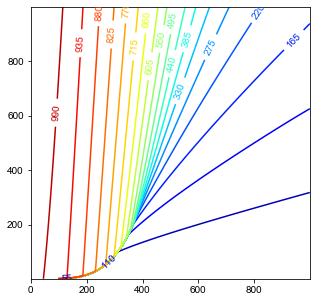

In [51]:
fig=plt.figure(figsize=(5,5))
ax=plt.gca()

# 读取数据
TT=np.loadtxt('data/contour/TT.dat')
PP=np.loadtxt('data/contour/PP.dat')
RHO=np.loadtxt('data/contour/RHO.dat')
# plot contour
nlevel=20
levels=np.linspace(np.min(RHO), np.max(RHO),nlevel )
# levels=[200, 400]
# print(levels)
CS=ax.contour(TT,PP/1e5,RHO,levels=levels, cmap='jet')
ax.clabel(CS, fontsize=10, fmt='%.0f')
plt.show()

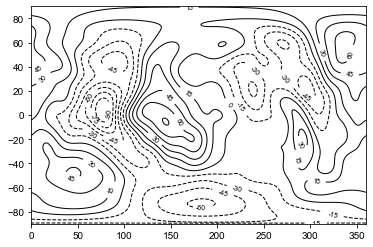

In [61]:
# read nc
data=Dataset('data/contour/osu91a1f_16.nc')
# print(data)
lon=data.variables['lon'][:]
lat=data.variables['lat'][:]
geoid=data.variables['z'][:]
X,Y = np.meshgrid(lon,lat)
# plot
fig=plt.figure(figsize=(6,4))
ax=plt.gca()
CS=ax.contour(X,Y,geoid,colors='k', linewidths=1, levels=16)
ax.clabel(CS, fmt='%.0f', fontsize=7)
plt.show()